<h1><center>Assignment 1 </center></h1>
<h2><center> SC9502B </center></h2>
<h3><center> Yasamin Modabber </center></h3>
<link rel="stylesheet" type="text/css" href="./text.css">

$\textbf{Question 3:}$ 

Allowing only for a single press of the Return key (=the command/string of commands has to be given on one line only and not as a series of commands), find out all the information
regarding your CPU and its properties

$\textbf{Answer:}$

$ lscpu


$\textbf{Question 4:}$ 

What is the command that can list all files starting with the letter n and the third letter being also n in the directory /bin

$\textbf{Answer:}$

$ ls /bin/n?n*

$\textbf{Question 5:}$ 

Allowing only for a single press of the Return key (=the command/string of commands
has to be given on one line only and not as a series of commands), give the command
that lists all the files and directories under the directory /usr such that the full path is visible
(=information where they are located in the directory structure shows up).

$\textbf{Answer:}$

$ find /usr

$\textbf{Question 6:}$

Allowing only for a single press of the Return key (=the command/string of
commands has to be given on one line only and not as a series of commands), give the command
that lists all the files that start with either the letter z or the letter y under the directory /bin in such
a way that listing ordered from the smallest to the largest file and the file sizes are listed in K, M, G
etc.

$\textbf{Answer:}$

$ ls -lSr -lh /bin/[zy]

where 

-lSr : Order of listing, from smallest t learges (reverse of -ls)


-lh : lists sizes in human readable format

$\textbf{ Questions 7 - 12}$

$\textbf{Question 13:}$

Using only single line (commands can be chained), list the processes in descending
order of memory usage.

$\textbf{Answer:}$

We use the command 

$ ps -e --sort -rss

for that.

$\textbf{Question 14:}$

Find the Python commands that give the smallest and largest floating point numbers
(one for each), and a single Python command that gives information about floats. Remember to
print out the outputs!

In [17]:
import sys

print("Smallest floating-point numbers :", sys.float_info.min) # command for smallest floating-point numbers
print("Largest floating-point numbers :", sys.float_info.max) # command for largest floating-point numbers
print("Information about floats:")
print(sys.float_info) # command for information about floats

Smallest floating-point numbers : 2.2250738585072014e-308
Largest floating-point numbers : 1.7976931348623157e+308
Information about floats:
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


$\textbf{Question 15:}$

Write a python script to read and plot the data from the two files in one single plot at the level of
publication quality. You have examples of this in the lecture notes.

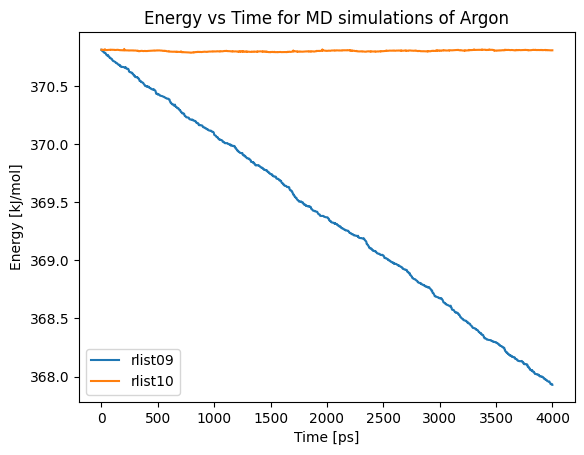

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc

sns.set_palette("tab10") # set color palette #The one used in the lecture note #Does not work

Files = ['energy-check-argon-nve-rlist09.xvg' , 'energy-check-argon-nve-rlist10.xvg']

time = [[],[]]
energy = [[],[]]

for file in Files: 
    with open(file, 'r') as f:
        for line in f:
            if not (line.startswith('#') or line.startswith('@')): 
                data = line.split()
                time[Files.index(file)].append(float(data[0]))
                energy[Files.index(file)].append(float(data[1]))
         
#convert all lists to numpy arrays
time = np.array(time)
energy = np.array(energy)

plt.plot(time[0], energy[0], label='rlist09')
plt.plot(time[1], energy[1], label='rlist10')

# Add labels and legend
plt.xlabel('Time [ps]')
plt.ylabel('Energy [kJ/mol]')
plt.title('Energy vs Time for MD simulations of Argon')
plt.legend()

$\textbf{Question 16:}$

Find python package, or write your own code, to fits for the two data sets (linear regression is totally
suitable). Justify your choice of method. Plot as above in a single plot

Text(0, 0.5, 'Energy [kJ/mol]')

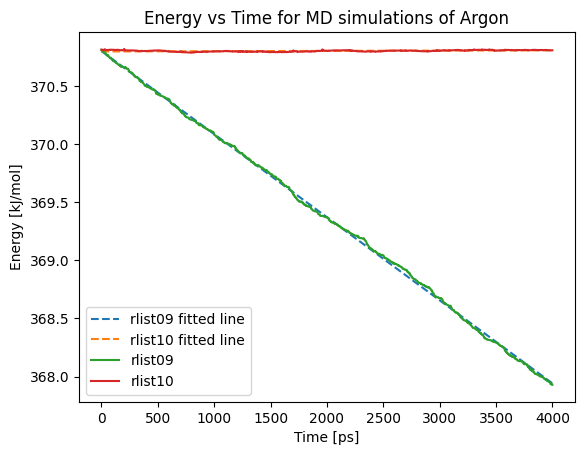

In [2]:
slope_09, intercept_09 = np.polyfit(time[0], energy[0], 1)
slope_10, intercept_10 = np.polyfit(time[1], energy[1], 1)

plt.plot(time[0], slope_09*time[0] + intercept_09, label='rlist09 fitted line' , linestyle='--')
plt.plot(time[1], slope_10*time[1] + intercept_10, label='rlist10 fitted line' , linestyle='--')

plt.plot(time[0] , energy[0], label='rlist09')
plt.plot(time[1] , energy[1], label='rlist10')

plt.legend()
plt.title('Energy vs Time for MD simulations of Argon')
plt.xlabel('Time [ps]')
plt.ylabel('Energy [kJ/mol]')

Since we can see the data behaves linearly with time, I have used the polyfit function from the numpy library to fit linear polynomials (polynomial of order 1) to my data. This function returns the slope and intercept of this fitted line, and then I can use these coefficients to plot a line that follows the behavior of my data.

$\textbf{Question 17:}$

Use pandas, numpy or such to find the statistical descriptors of the data.

In [3]:
# We will find the mean, standard deviation and variance of the data

mean_09 = np.mean(energy[0])
std_09 = np.std(energy[0])
var_09 = np.var(energy[0])
mean_10 = np.mean(energy[1])
std_10 = np.std(energy[1])
var_10 = np.var(energy[1])

#printing the values
print('Mean of rlist09: {} , Standard deviation of rlist09: {} , Variance of rlist: {}'.format(mean_09 , std_09 , var_09))
print('Mean of rlist10: {} , Standard deviation of rlist10: {} , Variance of rlist10: {}'.format(mean_10 , std_10 , var_10))

Mean of rlist09: 369.37079804797605 , Standard deviation of rlist09: 0.8258730332030509 , Variance of rlist: 0.6820662669720077
Mean of rlist10: 370.80141659670164 , Standard deviation of rlist10: 0.0061666166401335 , Variance of rlist10: 3.802716078637137e-05


$\textbf{Question 18:}$

Plot the distribution (or histogram) of the fluctuations for the case of energy-check-argon-nve-rlist10.xvg. Can the data be fitted to a simple distribution (if so, give the usual data descriptors)?

Mean of rlist10: 370.801 , Standard deviation of rlist10: 0.006


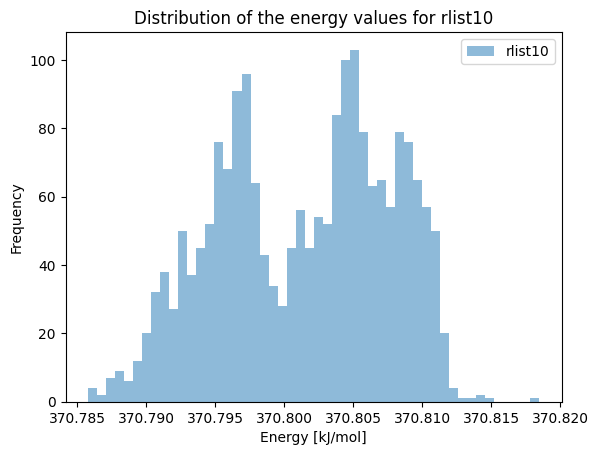

In [10]:
from scipy.stats import norm

plt.hist(energy[1], bins=50, alpha=0.5, label='rlist10')
plt.title('Distribution of the energy values for rlist10')
plt.xlabel('Energy [kJ/mol]')
plt.ylabel('Frequency')
plt.legend()


mu, std = norm.fit(energy[1]) # We fit a normal distribution to the data
print('Mean of rlist10: {} , Standard deviation of rlist10: {}'.format(round(mu,3) , round(std,3)))
